Notes: Why is Factor Analysis Desirable?
1. The EmoRoBERTa model gives great results for feature engineering but not classification. The majority of rows don't have any clear 'winner' coming from just a single emotion.
2. To create labels that capture the interplay between different emotions, factor analysis is a great choice. This workbook includes steps to run that, including some of the EDA necessary to find a solution with satisfying results.
3. In later steps of the model, the labels from the factor analysis are formulated as the output of a classification model, which generalizes very well based on the 28 output columns from the EmoRoBERTa model.


Steps in this notebook:
1. Load libraries and initial data
2. 

Techniques describes further in detail in this link:
https://www.earthinversion.com/geophysics/exploratory-factor-analysis/

# Load libraries and functions

In [1]:
import pandas as pd
import numpy as np

#random seed for reproducibility
np.random.seed(67)

In [2]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib
from sklearn.preprocessing import StandardScaler

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

style.use('ggplot')

import seaborn as sns

In [3]:
data = pd.read_csv('sample data files/input_for_step_3.csv')

In [4]:
emotions_list = ['admiration', 'amusement', 'anger', 'annoyance', 'approval',
'caring', 'confusion', 'curiosity', 'desire',
'disappointment',
'disapproval',
'disgust',
'embarrassment',
'excitement',
'fear',
'gratitude',
'grief',
'joy',
'love',
'nervousness',
'optimism',
'pride',
'realization',
'relief',
'remorse',
'sadness',
'surprise',
'neutral']

In [5]:
df = data[emotions_list]

In [6]:
df.shape

(3363, 28)

# v1_full data set

## Scaling 

In [7]:
df.mean()

admiration        0.005104
amusement         0.000600
anger             0.000915
annoyance         0.001626
approval          0.052726
caring            0.062742
confusion         0.007493
curiosity         0.100139
desire            0.017821
disappointment    0.007758
disapproval       0.002828
disgust           0.002100
embarrassment     0.000125
excitement        0.031422
fear              0.002461
gratitude         0.045368
grief             0.003274
joy               0.007391
love              0.001100
nervousness       0.001934
optimism          0.015240
pride             0.002512
realization       0.008381
relief            0.000367
remorse           0.000930
sadness           0.019536
surprise          0.010308
neutral           0.587799
dtype: float64

In [8]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))

In [9]:
df_scaled.columns = df.columns

## diagnostics to determine if FA is approrpriate

In [10]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
chi_square_value, p_value

(124378.97929218244, 0.0)

## Determining Number of factors 

In [11]:
fa = FactorAnalyzer(rotation=None)
fa.fit(df_scaled)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.60025543e+00, 2.09692712e+00, 1.95158922e+00, 1.71535688e+00,
       1.35991092e+00, 1.28004793e+00, 1.19970484e+00, 1.11860698e+00,
       1.10146233e+00, 1.04859913e+00, 1.03904625e+00, 1.00766185e+00,
       1.00270971e+00, 9.94257541e-01, 9.60053705e-01, 9.57541318e-01,
       9.10634876e-01, 8.97910533e-01, 8.57222206e-01, 8.31741867e-01,
       7.83043345e-01, 6.42889674e-01, 5.96247306e-01, 4.79296892e-01,
       3.19873829e-01, 2.06182142e-01, 4.12261777e-02, 7.38132321e-15])

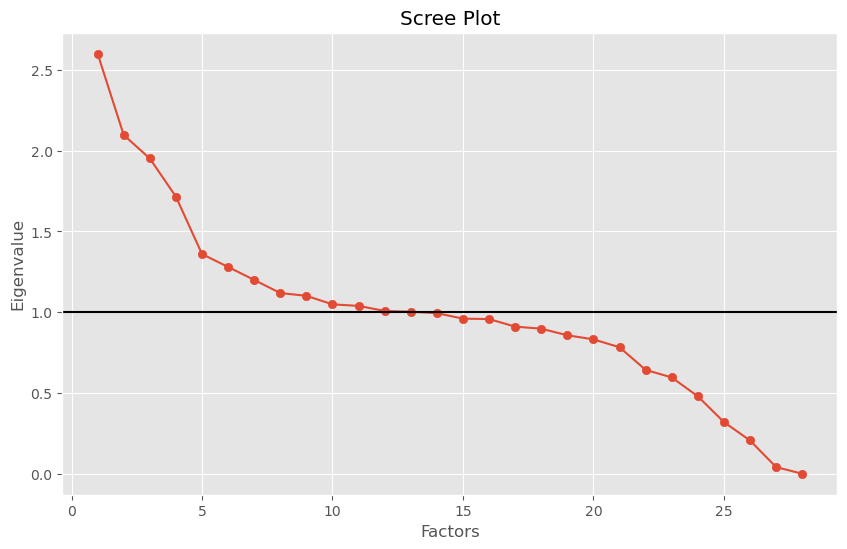

In [12]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,c='k')

plt.show()

## running analysis 

In [13]:
fa = FactorAnalyzer(rotation="varimax", n_factors=13)
fa.fit(df_scaled)
fa
#pd.DataFrame(fa.loadings_)

FactorAnalyzer(n_factors=13, rotation='varimax', rotation_kwargs={})

In [14]:
scores = fa.transform(df_scaled)
scores.shape

(3363, 13)

In [15]:
pd.DataFrame(fa.loadings_, index=df_scaled.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12
admiration,-0.002885,-0.004157,-0.017316,0.016217,-0.032252,0.123753,0.055597,-0.008280,0.019165,0.006976,0.019534,0.144081,-0.028189
amusement,0.013714,-0.022391,0.303064,-0.039847,-0.032097,-0.026031,0.069375,0.055665,-0.007934,-0.010047,-0.003896,0.155673,-0.065457
anger,0.021074,0.947636,-0.028275,0.016523,-0.012113,-0.007408,0.045356,0.235609,0.013607,-0.001082,0.003316,-0.019522,0.023170
annoyance,0.032819,0.726290,0.105128,-0.011582,0.004864,-0.013786,-0.027402,0.008095,0.002393,-0.004942,-0.004143,-0.052062,0.051941
approval,-0.023705,-0.007997,-0.003238,0.055370,-0.075414,-0.012294,-0.022264,-0.001995,0.989666,-0.018733,-0.006711,-0.006808,0.102476
caring,-0.023351,-0.012944,-0.080429,0.960284,-0.066611,-0.063628,0.097456,-0.019148,-0.080807,-0.019881,-0.041133,-0.184050,-0.084004
confusion,-0.001388,0.003152,0.002845,-0.014086,0.134548,-0.009152,-0.009175,-0.008079,-0.015878,-0.003881,-0.002134,-0.003062,0.021493
curiosity,-0.001719,-0.030187,-0.048790,-0.065698,0.982115,-0.041646,-0.007876,0.000945,-0.002469,-0.000281,-0.005216,-0.061660,-0.175328
desire,-0.010507,0.115555,0.013540,0.010332,-0.030338,-0.016540,0.043339,0.989217,-0.009295,-0.006780,-0.004036,-0.029961,0.011708
disappointment,0.212972,0.074698,-0.003628,-0.009485,0.011484,-0.007275,0.018519,-0.029684,-0.040253,-0.000673,-0.004424,-0.011931,0.254843


In [16]:
# https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#module-factor_analyzer.factor_analyzer
row_labels = ['variance','proportional_variance','cumulative_variances']

In [17]:
pd.DataFrame(fa.get_factor_variance(), index = row_labels)

,0,1,2,3,4,5,6,7,8,9,10,11,12
variance,1.959126,1.763583,1.537187,1.357187,1.281674,1.132168,1.129192,1.079923,1.060545,1.019508,1.002748,0.608225,0.559152
proportional_variance,0.069969,0.062985,0.054900,0.048471,0.045774,0.040435,0.040328,0.038569,0.037877,0.036411,0.035812,0.021722,0.019970
cumulative_variances,0.069969,0.132954,0.187853,0.236324,0.282098,0.322533,0.362861,0.401430,0.439307,0.475718,0.511530,0.533252,0.553222


# V2 dropping Vars with low Signal

In [18]:
df.mean()

admiration        0.005104
amusement         0.000600
anger             0.000915
annoyance         0.001626
approval          0.052726
caring            0.062742
confusion         0.007493
curiosity         0.100139
desire            0.017821
disappointment    0.007758
disapproval       0.002828
disgust           0.002100
embarrassment     0.000125
excitement        0.031422
fear              0.002461
gratitude         0.045368
grief             0.003274
joy               0.007391
love              0.001100
nervousness       0.001934
optimism          0.015240
pride             0.002512
realization       0.008381
relief            0.000367
remorse           0.000930
sadness           0.019536
surprise          0.010308
neutral           0.587799
dtype: float64

In [19]:
cols_to_keep = pd.DataFrame(df.mean(), columns=['value'])
cols_to_keep.sort_values('value', ascending=False)

,value
neutral,0.587799
curiosity,0.100139
caring,0.062742
approval,0.052726
gratitude,0.045368
excitement,0.031422
sadness,0.019536
desire,0.017821
optimism,0.015240
surprise,0.010308


In [20]:
cols_to_keep = cols_to_keep[cols_to_keep.value > .005]
cols_to_keep.shape

(15, 1)

In [21]:
list(cols_to_keep.index)

['admiration',
 'approval',
 'caring',
 'confusion',
 'curiosity',
 'desire',
 'disappointment',
 'excitement',
 'gratitude',
 'joy',
 'optimism',
 'realization',
 'sadness',
 'surprise',
 'neutral']

In [22]:
df = df[list(cols_to_keep.index)]
df.shape

(3363, 15)

## Scaling 

In [23]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))

In [24]:
df_scaled.columns = df.columns

## diagnostics to determine if FA is approrpriate

In [25]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_scaled)
chi_square_value, p_value

(10946.928268020614, 0.0)

## Determining Number of factors 

In [26]:
fa = FactorAnalyzer(rotation=None)
fa.fit(df_scaled)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.66781693, 1.25941272, 1.21972819, 1.17175786, 1.12373605,
       1.07555616, 1.01277198, 1.00387362, 0.99072521, 0.95651812,
       0.92547018, 0.89812576, 0.85137006, 0.82434541, 0.01879175])

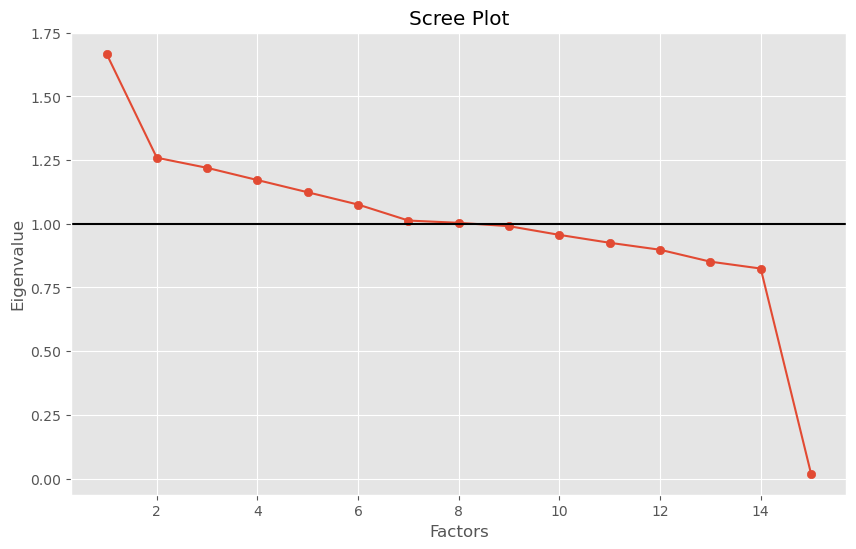

In [27]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,c='k')

plt.show()

## running analysis 

In [28]:
fa = FactorAnalyzer(rotation="varimax", n_factors=8)
fa.fit(df_scaled)
fa
#pd.DataFrame(fa.loadings_)

FactorAnalyzer(n_factors=8, rotation='varimax', rotation_kwargs={})

In [29]:
pd.DataFrame(fa.loadings_, index=df_scaled.columns)

,0,1,2,3,4,5,6,7
admiration,-0.023205,-0.010267,0.132950,0.017591,-0.004256,0.008278,0.067788,0.001182
approval,-0.066784,-0.008368,0.005558,0.992629,0.001293,-0.007880,-0.039902,-0.090561
caring,-0.073070,0.995153,-0.054947,-0.030052,-0.006806,0.001936,-0.059533,-0.046245
confusion,0.132664,-0.006252,-0.009943,-0.011152,-0.006998,0.000224,0.002600,0.016471
curiosity,0.989347,-0.042122,-0.072616,-0.046513,-0.004899,-0.037424,-0.053836,-0.110136
desire,-0.034775,0.002467,-0.024775,-0.014170,0.997320,0.002564,-0.030733,-0.014360
disappointment,0.002281,-0.010218,-0.005315,0.009459,-0.004241,-0.003306,-0.007447,0.318107
excitement,-0.022393,-0.018463,0.003247,-0.022730,-0.007572,-0.008997,0.599669,-0.019754
gratitude,-0.017225,-0.003469,0.993683,-0.065855,-0.012284,-0.029821,-0.076291,-0.042169
joy,-0.011224,-0.007934,0.048143,0.039710,-0.009028,-0.013185,0.262077,-0.016791


The reason for using factor analysis is illustrated by this table. For many datasets, 'Neutral' is the highest ranking emotion score output from the EmoRoBERTa model. If posts were classified simply according to the highest

However, through factor analysis, we are able to get clearer differentiation in the nuance between a post with elements of neutral but a clear 'flavor' of another type of emotion as well. 

In [30]:
factor_names = ['Curiousity', 'Caring', 'Gratitude', 'Approval', 'Desire', 'Neutral', 'Excitement', 'Sadness']

In [31]:
pd.DataFrame(fa.get_factor_variance(), index=row_labels)

,0,1,2,3,4,5,6,7
variance,1.269649,1.160306,1.154850,1.116826,1.040092,1.022647,0.614769,0.536147
proportional_variance,0.084643,0.077354,0.076990,0.074455,0.069339,0.068176,0.040985,0.035743
cumulative_variances,0.084643,0.161997,0.238987,0.313442,0.382782,0.450958,0.491943,0.527686


## Export FA results for each row as well as a summary table of factor loadings

In [32]:
factor_outputs = pd.DataFrame(fa.transform(df_scaled), columns=factor_names)

In [33]:
factor_outputs.head()

,Curiousity,Caring,Gratitude,Approval,Desire,Neutral,Excitement,Sadness
0,-0.231132,0.575832,-0.171367,0.418054,-0.174345,1.024650,-0.132402,-0.159542
1,-0.487013,-0.393792,-0.302673,-0.371571,-0.194929,0.009755,-0.405315,-0.353052
2,-0.487013,-0.393792,-0.302673,-0.371571,-0.194929,0.009755,-0.405315,-0.353052
3,-0.204601,-0.450305,-0.254348,-0.076360,-0.303358,-0.189474,2.344972,5.704275
4,-0.204601,-0.450305,-0.254348,-0.076360,-0.303358,-0.189474,2.344972,5.704275


In [34]:
factor_outputs.to_csv('exploratory factor analysis/factor outputs k=8.csv', index=False)

In [35]:
pd.DataFrame(fa.loadings_, index=df_scaled.columns, columns=factor_names).to_csv('exploratory factor analysis/summary of factor scores k=8.csv',index=False)

## Labeling the top factor in each row and merging with input data to pass along to next pipeline step

In [38]:
factor_outputs['top_factor_label'] = factor_outputs.idxmax(axis=1)

In [40]:
pd.concat([data, factor_outputs], axis=1).to_csv('sample data files/input_for_step_3b.csv', index=False)